__CST4070 - BLOCK 2 CHALLENEGE__
--
__Nishita Chaudhary - M00977896__
--

In [462]:
#Importing the python libraries
import pandas as pd #Creates a data frame, gives structure to the data and gives data analysis.
import matplotlib.pyplot as plt #graphs for data visulalization
import seaborn as sns #for graphs
import numpy as np #Numerical computing for multi-dimension array
from sklearn.model_selection import train_test_split #Used to split into training and testing datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler #convert categorical data into numerical format 
#and StandardScaler #Tranforms the numerical data mean = 0 and variance = 1
from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #model performance and overall accuracy and confusion matrix

The dataset in .csv format with "87946" rows and "75" columns.
In excel, from name column extract bedroom, property type and beds values using excel formula-

1.Bathroom =IFERROR(VALUE(LEFT(A1, SEARCH(" ", A1 & " ") - 1)), "") 2.Bedroom =IFERROR(VALUE(MID(F2, SEARCH("bedroom", F2) - 2, 1)), ""))The blank values were 1 which is extracted from name column.
3.property type =TRIM(MID(F2, 1, SEARCH(" in", F2) - 1e 
y

In [481]:
#Loading the listing dataset using pandas library
df = pd.read_csv('listing_original.csv')
pd.set_option('display.max_colwidth', 0) #sets maximum width for displaying DataFrame columns to unlimited
df.shape

<ipython-input-481-e2c1a1731260>:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('listing_original.csv')


(87946, 75)

In [464]:
#Displaying the dataset information checking the datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87946 non-null  float64
 1   listing_url                                   87946 non-null  object 
 2   scrape_id                                     87946 non-null  float64
 3   last_scraped                                  87946 non-null  object 
 4   source                                        87946 non-null  object 
 5   name                                          87946 non-null  object 
 6   property_type                                 87946 non-null  object 
 7   description                                   86679 non-null  object 
 8   neighborhood_overview                         47190 non-null  object 
 9   picture_url                                   87943 non-null 

From the above table, 
The indexRange is from 0 to 87946.
The datatypes are mixed containing object, int and float.ALso they containing null or missing values.Which can be futher preprocessed for analysis
The price column appears to be of type object.Additionalyy having "$" sign in it.
Some uncessary columns are present like description , picture_url, host_id,host_thumbnail_url etc. which are not considered for analysis.

__Data Preprocessing__
--

In [465]:
#Dropping colums which are have more than 80% null values
drop_cols = df.columns[df.isnull().sum()/df.shape[0] > 0.8]
print(drop_cols)
df.drop(drop_cols, axis=1, inplace=True)
drop_cols
print(df.shape)

Index(['neighbourhood_group_cleansed', 'calendar_updated', 'license'], dtype='object')
(87946, 72)


In [466]:
#Removing '$' from price and converting it to float datatype.
df['price'] = df['price'].replace('[\$,]', '', regex=True)
df['price'] = df['price'].astype(float)

In [467]:
#Dealing with null values of 'room_type', 'accommodates', 'bedrooms', 'bathrooms', 'bathrooms_text', 'beds', 'amenities', 'price' etc.
#No needed to convert the datatype.
df['bedrooms'].fillna(0, inplace=True)  # Replace with 0 as it have only studio room can be seen in name column
df['bathrooms'].fillna(0, inplace=True)#Replacing with 0 as there is no info given in the name column
df['bathrooms'].fillna(0, inplace=True)
df['beds'].fillna(0, inplace=True) #Replacing with 0 as there is no info givin in the name column
df['number_of_reviews'].fillna(df['number_of_reviews'].mean(), inplace=True) 
#Replacing missing values with the mean 
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True) 
#Filling the null values with 0
df['host_total_listings_count'].fillna(0, inplace=True)
df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0], inplace=True)
df['neighbourhood'] = df['neighbourhood'].fillna('Unknown')

Deriving new average review score column: Taking all the review score and combining it by overall mean of review score.this gives a brief summary of overall review score.Replacing missing values with the mean. 

In [468]:
review_score_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value']
for c in review_score_columns:
    df[c].fillna(df[c].mean(), inplace=True)
df['average_score_review'] = df[review_score_columns].mean(axis=1)
print(df['average_score_review'])
print(df.shape)

0        4.680000
1        4.788571
2        4.740000
3        4.844286
4        4.665714
           ...   
87941    4.688963
87942    4.688963
87943    4.688963
87944    4.688963
87945    4.688963
Name: average_score_review, Length: 87946, dtype: float64
(87946, 73)


__Columns Selecting__
--

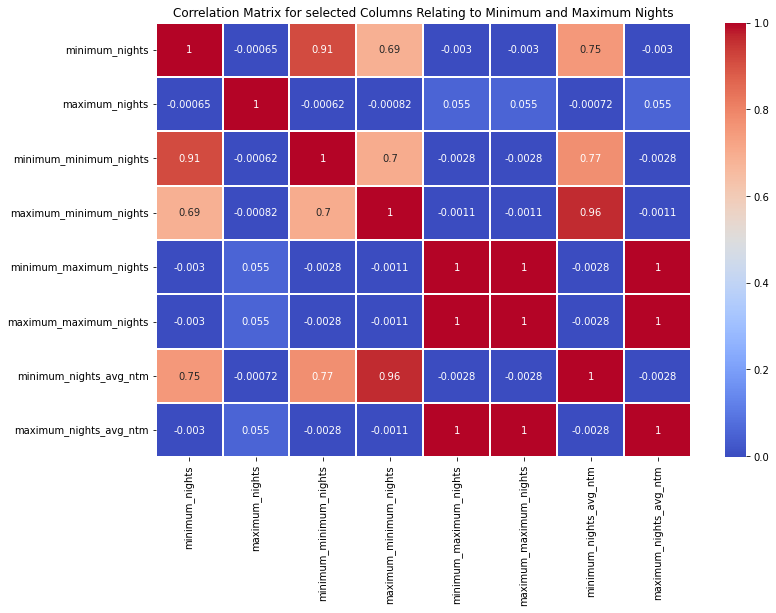

In [469]:
#Correlation matrix for minimun night
nights = ['minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']

#Calculating the correlation matrix for the nights columns
corr_matrix_night = df[nights].corr()
#Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_night, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix for selected Columns Relating to Minimum and Maximum Nights')
plt.show()

Observing the correlation analysis, it's evident that, apart from "minimum_nights" and "maximum_nights," all other variables exhibit strong correlations. Therefore, focusing only on "minimum_nights" and "maximum_nights" for analysis.
Select varibles = 'minimum_nights', 'maximum_nights'

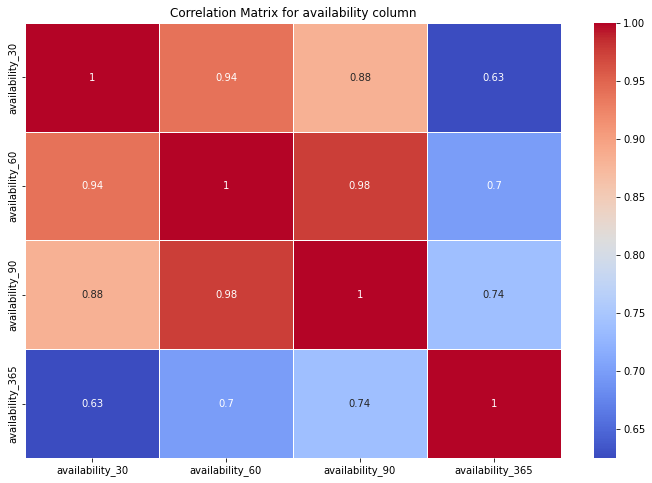

In [470]:
#Chaecking the correlation matrix for availibity
availability = ['availability_30', 'availability_60',
       'availability_90', 'availability_365']
#Calculating the correlation matrix for availabity columns
corr_matrix_available = df[availability].corr()
#Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_available, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for availability column')
plt.show()

"availability_30," "availability_60," and "availability_90" clearly show a significant degree of association, according to the correlation matrix. 
Given this, choosen "availability_365" alone in order to capture the annual availability trend.

__Data visualization__
--

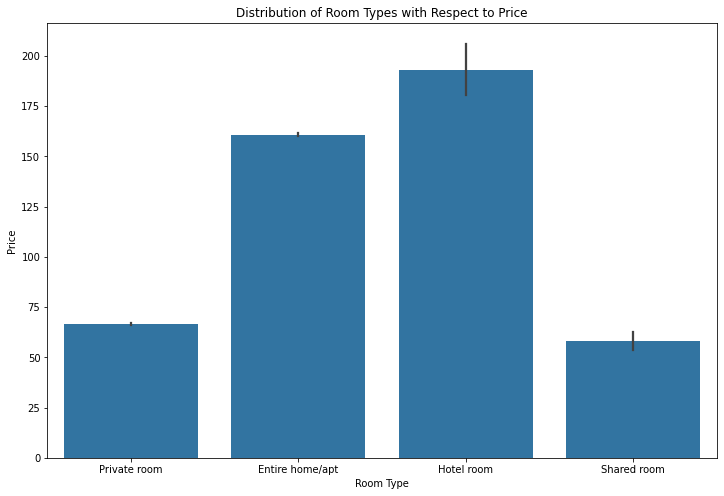

In [471]:
#Plotting graph with price and differnt room types
plt.figure(figsize=(12, 8))
sns.barplot(x="room_type", y="price", data=df_no_outliers)
plt.title("Distribution of Room Types with Respect to Price")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

Comparable pricing is indicated by the plotted graph, which shows that the average costs for private and shared rooms are similar. On the other hand, hotel rooms are more expensive on average than complete homes or apartments when compared to other room categories.

Text(0.5, 1.0, 'count of property')

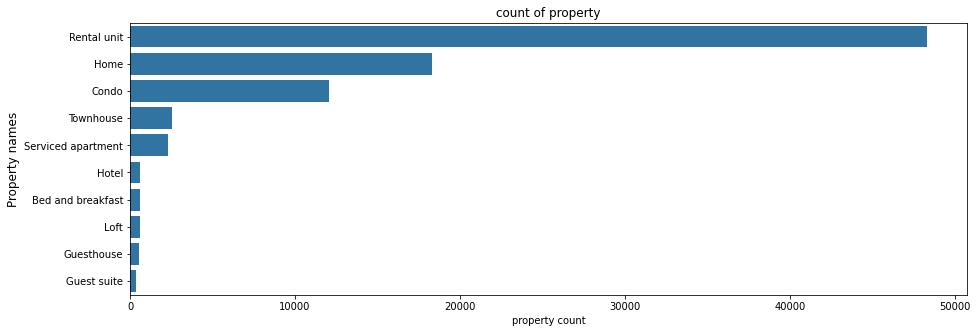

In [472]:
#Dispalying the top 10 property types
plt.figure(figsize = (15,5))
sns.countplot(df['property_type'], order = df.property_type.value_counts().iloc[:10].index)
plt.xlabel("property count")
plt.ylabel("Property names", fontsize = 'large')
plt.title("count of property")

The above graph indicates that, of all the property kinds in the sample, rental units have the highest numbers, indicating a widespread preference for individual rental accommodations over other property types.

__Feature Importance__

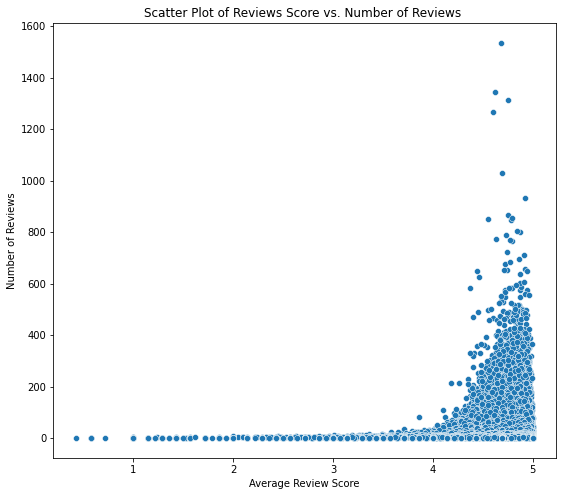

In [473]:
#Displaying the average score review with no of review
plt.figure(figsize=(9, 8))
sns.scatterplot(x='average_score_review', y='number_of_reviews', data=df3)
plt.title('Scatter Plot of Reviews Score vs. Number of Reviews ')
plt.xlabel('Average Review Score')
plt.ylabel('Number of Reviews')
plt.show()

The scatter plot shows that most property's with average scores between 4 and 5 have a tendency to have a number of reviews spread from 0 to about 600. This indicates a concentration of positively reviewed properties with varying review counts.
The'success_indicator' based on these ranges, taking into consideration the features seen in the scatter plot, where the majority of properties have average scores between 4 and 5, and the number of reviews is scattered across the range of 0 to the midpoint of about 600. Successful properties might include, for example, those with average scores towards the upper end of the 4 to 5 range and a sizable number of reviews up to the required midpoint. This method uses a large number of positive evaluations and feedback to find listings that might be successful.So, considering the averagescore rating as 4.And number of review as 2.

181.34981693311806


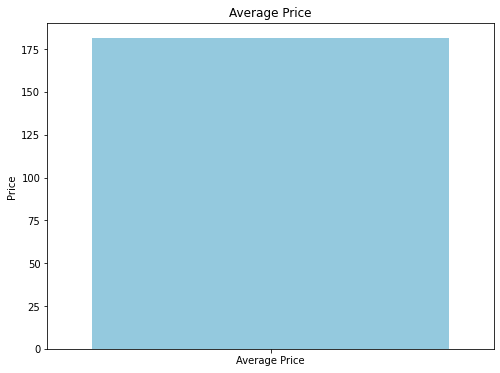

In [474]:
# Plotting a bar plot for the average price
mean_price = df['price'].mean()
print(mean_price)
plt.figure(figsize=(8, 6))
sns.barplot(x=['Average Price'], y=[mean_price], color='skyblue')
plt.title('Average Price')
plt.ylabel('Price')
plt.show()

When assessing a listing's attraction, the average price is a key factor. The main trend of the pricing distribution can be understood by computing the mean of the 'price' column. While a lower average price can imply affordability, a higher average price might indicate premium listings.To put it simply, this condition selects rows from the DataFrame only when the 'price' is higher than the average price. By assisting in the identification of listings with prices above the mean, it provides information on the dataset's more expensive places to stay. The values which are greater than 181.34 will be set as a thresold for price.

In [475]:
#From the above analysis the varibles are taken into consideration for analysis 
df3 = df.loc[:,('accommodates', 'bedrooms', 'bathrooms', 'beds', 'price', 'average_score_review',
         'reviews_per_month' ,'number_of_reviews' ,'minimum_nights', 'maximum_nights','availability_365','instant_bookable','has_availability',
         'host_total_listings_count','host_is_superhost','neighbourhood_cleansed')]
df3.head()
df3.shape

(87946, 16)

In [476]:
#Create a missing value summary table 
total = df3.isnull().sum().sort_values()
percent = (df3.isnull().sum()/df3.isnull().count()).sort_values()
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent of missing'])
missing_data.head(15)
#AS from the table there no missing values or nan values

,Total,Percent of missing
accommodates,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
beds,0,0.0
price,0,0.0
average_score_review,0,0.0
reviews_per_month,0,0.0
number_of_reviews,0,0.0
minimum_nights,0,0.0
maximum_nights,0,0.0


__Succeess indicator__
--

In [477]:
#For creating success indicator I have took price, average review score and number of reviews.
price_threshold = df3['price'].mean() #Taking the mean of price.
average_score_review = 4 
#Creating a new column for getting good and bad based on threshold
df3['success_indicator'] = np.where((df3['price'] > price_threshold) &
                                     (df3['average_score_review'] > average_score_review) &
                                    (df3['number_of_reviews'] > 2 ), 'Good', 'Bad')

#Printing the count of good and bad based on the success_indicator
count_good = df3[df3['success_indicator'] == 'Good'].shape[0]
count_bad = df3[df3['success_indicator'] == 'Bad'].shape[0]

#Displaying the counts of good and bad in a new column success_indicator.
print(f'Number of Good listings: {count_good}')
print(f'Number of Bad listings: {count_bad}')
#df3['success_indicator'] = df3['success_indicator'].astype(bool)

Number of Good listings: 12098
Number of Bad listings: 75848


The provided code demonstrates that 12k+ records are classified as 'good,' while 75k+ records are categorized as 'bad,' indicating a higher prevalence of negative counts in the listing.

__Modeling -1 Logistic Regression__
--

In [478]:
df3.head()

,accommodates,bedrooms,bathrooms,beds,price,average_score_review,reviews_per_month,number_of_reviews,minimum_nights,maximum_nights,availability_365,instant_bookable,has_availability,host_total_listings_count,host_is_superhost,neighbourhood_cleansed,success_indicator
0,2,1.0,1.5,2.0,42.0,4.680000,1.45,216,2,730,217,t,t,1.0,f,Wandsworth,Bad
1,5,2.0,1.0,3.0,175.0,4.788571,0.27,38,5,240,40,f,t,2.0,f,Hammersmith and Fulham,Bad
2,1,1.0,1.0,1.0,79.0,4.740000,0.26,41,1,29,360,f,t,4.0,f,Islington,Bad
3,2,1.0,1.0,1.0,150.0,4.844286,0.56,94,7,30,73,f,t,12.0,f,Kensington and Chelsea,Bad
4,2,1.0,1.0,1.0,46.0,4.665714,1.21,180,4,365,196,f,t,1.0,t,Greenwich,Bad


In [479]:
#Extracting the categorical and numerical columns
categorical_cols = [ 'instant_bookable', 'has_availability', 'host_is_superhost', 'neighbourhood_cleansed']

numerical_cols = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'price',
                   'average_score_review', 'reviews_per_month', 'number_of_reviews',
                   'minimum_nights', 'maximum_nights', 'availability_365',
                   'host_total_listings_count']

#Dropping the Target varible 
X = df3.drop('success_indicator', axis=1)
y = df3['success_indicator']

#Label encode categorical columns
l = LabelEncoder()
for col in categorical_cols:
    X[col] = l.fit_transform(X[col])

#Standardize numerical variables using StandardScaler which convert mean =0 and varia
s = StandardScaler()
X[numerical_cols] = s.fit_transform(X[numerical_cols])

#Splitting the data into training and testing sets and using 20% for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the logistic regression model
lmodel = LogisticRegression()

#Fiting the model on the trai data
lmodel.fit(X_train, y_train)

#Making predictions on the test data
y_pred = lmodel.predict(X_test)

#Evaluating the model based on accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

#Printing the accuracy of the model
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report_result)


c:\users\nishu\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         Bad       0.88      0.98      0.93     15217
        Good       0.54      0.16      0.24      2373

    accuracy                           0.87     17590
   macro avg       0.71      0.57      0.59     17590
weighted avg       0.84      0.87      0.84     17590



__Modeling-2 Decision Tree__
-

In [480]:
# Using 20% for testing and 80% for training.X and y are define in above model
#df3['success_indicator'] = df3['success_indicator'].astype(bool)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Defining the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

#Fitting the model on the train data
model.fit(X_train, y_train)
#predecting on the test data
y_pred = model.predict(X_test)

#Run the model with accuray report and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
class_report_result = classification_report(y_test, y_pred)
confu_mat = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report_result)
print(confu_mat)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00     15217
        Good       1.00      1.00      1.00      2373

    accuracy                           1.00     17590
   macro avg       1.00      1.00      1.00     17590
weighted avg       1.00      1.00      1.00     17590

[[15215     2]
 [    0  2373]]


_Thank You_
--